In [1]:
import numpy as np
import matplotlib.pyplot as plt

# A crash course on NumPy for images

Images in `scikit-image` are represented by NumPy `ndarrays`. Hence, many common operations can be achieved using standard NumPy methods for manipulating arrays:

In [2]:
from skimage import data
camera = data.camera()
type(camera)

numpy.ndarray

Retrieve the geometry of the image and the number of pixels:

In [3]:
camera.shape 

(512, 512)

In [4]:
camera.size

262144

Retrieving statistcal information about image intensity values:

In [5]:
camera.min(), camera.max()

(0, 255)

In [6]:
camera.mean()

118.31400299072266

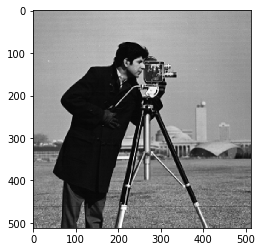

In [7]:
plt.gray()
plt.imshow(camera)

NumPy arrays representing image can be of different integer or float numerical types. See Image data types and what they mean for more information about these types and how `scikit-Image` treats them.

## NumPy indexing

NumPy indexing can be used both for looking at the pixel values and to modify them:

In [8]:
# Get the value of the pixel at the 10th row and 20th column
camera[10,20]

153

In [9]:
# Set to black the pixel at the 3rd row and 10th column
camera[3,10]=0

In [10]:
camera[3,10]

0

Be careful! In NumPy indexing, the first dimension (`camera.shape[0]`) correspond to rows, while the second (`camera.shape[1]`) corresponds to columns, with the origin (`camera[0,0]`) at the top-left corner. Thsi matches matrix/linear algebra notation, but is in contrast to Cartesian (x,y) coordinates. See Coordinate conventions below for more details.

Beyond individual pixels, it is possible to access / modify values of whole sets of pixels using the different indexing capabilities of NumPy:

Slicing:

In [11]:
# Set the first ten lines to "black" (0)
camera[:10]=0

Masking (indexing with masks of booleans):

In [12]:
mask = camera < 87
# Set to "white" (255) the pixels where mask is True
camera[mask] = 255

Fancy indexing (indexing with sets of indices):

In [13]:
inds_r = np.arange(len(camera))
inds_c = 4*inds_r % len(camera)
camera[inds_r,inds_c] = 0

Masks are very useful when you need to select a set of pixels on which to perform the manipulations. The mask can be any boolean array of the same shape as the image (or a shape broadcastable to the image shape). This can be used to define a region of interest, for example, a disk:

In [14]:
nrows, ncols = camera.shape
row, col = np.ogrid[:nrows,:ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row-cnt_row)**2+(col-cnt_col)**2 >
                  (nrows/2)**2)
camera[outer_disk_mask]=0

Boolean operations from NumPy can be used to define even more complex masks:

In [15]:
lower_half = row > cnt_row
lower_half_disk = np.logical_and(lower_half,outer_disk_mask)
camera = data.camera()
camera[lower_half_disk]=0

## Color images

All of the above remains true for color image. A color image is a NumPy array with an additional trailling dimension fro the channels:

In [16]:
cat = data.chelsea()

In [17]:
type(cat)

numpy.ndarray

In [18]:
cat.shape

(300, 451, 3)

This shows that `cat` is a 300-by-451 pixel image with three channels (red, green, and blue). As before, we can get and set the pixel values:

In [19]:
cat[10,20]

array([151, 129, 115], dtype=uint8)

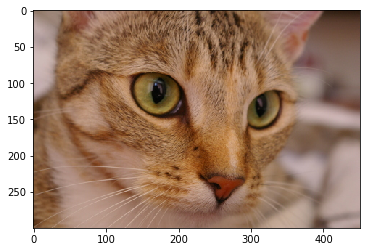

In [20]:
plt.imshow(cat)

In [21]:
# Set the pixel at (50th row, 60th column) to "black"
cat[50,60]=0

In [22]:
# Set the pixel at (50th row, 61th column) to "green"
cat[50,61]=[0,255,0] # [red,green,blue]

We can also use 2D boolean masks for 2D multichannel images, as we did with the grayscale image above:

In [23]:
# .. plot::

Using a 2D mask on a 2D color image

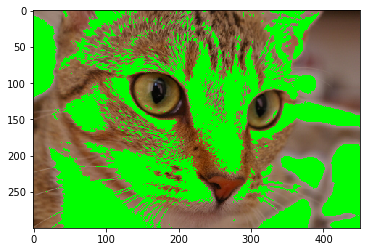

In [24]:
from skimage import data
cat = data.chelsea()
reddish = cat[:,:,0] > 160
cat[reddish]=[0,255,0]
plt.imshow(cat)

## Coordinate conventions

Because `scikit-image` represents images using NumPy arrays, the coordiante conventions must match. Two-dimensional (2D) grayscale images (such as **camera** above) are indexed by rows and columns (abbreviated to either `(row,col)` or `(r,c)`), with the lowest element `(0,0)` a the top-left corner. In various parts of the library, you will also see `rr` and `cc` refer to lists of row and column coordinates, where `x` is the horizontal coordinate, `y` - the vertical one, and the origin is at the bottom left (Matplotlib axes, for example, use this convention).

In the case of multichannel images, the last dimension is used for color channels and is denoted by `channel` or `ch`.

Finally, for volumetric (3D) images, such as videos, magnetic resonance image (MRI) scans, confocal microscopy, etc. we refer to the leading dimension as `plane`, abbreviated as `pln` or `p`.

These conventions are summarized below:

| **Image type**  | **Coordiantes** |
| :------------- | :------------- |
| 2D grayscale  | (row,col)  |
| 2D multichannel (e.g. RGB)  | (row,col,ch)  |
| #D grayscale  | (pln,row,col)  |
| 2D multichannel  | (pln,row,col,ch)  |

Many functions in `scikit-image` can operate on 3D images directly:

## Notes on the order of array dimensions

## A note on the time dimension